# DATA SCIENTIST
**In this tutorial, I only explain you what you need to be a data scientist neither more nor less.**

**Content:**

1. [Machine Learning](#1)
    1. [Supervised Learning](#2)
        1. [EDA(Exploratory Data Analysis)](#3)
        1. [K-Nearest Neighbors (KNN)](#4)
        1. [Regression](#5)
        1. [Cross Validation (CV)](#6)
        1. [ROC Curve](#7)
        1. [Hyperparameter Tuning](#8)
        1. [Pre-procesing Data](#9)
    1. [Unsupervised Learning](#10)
        1. [Kmeans Clustering](#11)
        1. [Evaluation of Clustering](#12)
        1. [Standardization](#13)
        1. [Hierachy](#14)
        1. [T - Distributed Stochastic Neighbor Embedding (T - SNE)](#15)
        1. [Principle Component Analysis (PCA)](#16)

In [196]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
# read csv (comma separated value) into data
data = pd.read_csv('/Users/garvitkhurana/Desktop/Projects/Data_Science/column_2C_weka.csv')
print(plt.style.available) # look at available plot styles
plt.style.use('ggplot')

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


<a id="1"></a> <br>
# 6. MACHINE LEARNING (ML)
In python there are some ML libraries like sklearn, keras or tensorflow. We will use sklearn.


<a id="2"></a> <br>
## A. SUPERVISED LEARNING
* Supervised learning: It uses data that has labels. Example, there are orthopedic patients data that have labels *normal* and *abnormal*.
    * There are features(predictor variable) and target variable. Features are like *pelvic radius* or *sacral slope*(If you have no idea what these are like me, you can look images in google like what I did :) )Target variables are labels *normal* and *abnormal*
    * Aim is that as given features(input) predict whether target variable(output) is *normal* or *abnormal*
    * Classification: target variable consists of categories like normal or abnormal
    * Regression: target variable is continious like stock market
    * If these explanations are not enough for you, just google them. However, be careful about terminology: features = predictor variable = independent variable = columns = inputs. target variable = responce variable = class = dependent variable = output = result

<a id="3"></a> <br>
### EXPLORATORY DATA ANALYSIS (EDA)
* In order to make something in data, as you know you need to explore data. Detailed exploratory data analysis is in my Data Science Tutorial for Beginners
* I always start with *head()* to see features that are *pelvic_incidence,	pelvic_tilt numeric,	lumbar_lordosis_angle,	sacral_slope,	pelvic_radius* and 	*degree_spondylolisthesis* and target variable that is *class*
* head(): default value of it shows first 5 rows(samples). If you want to see for example 100 rows just write head(100)


In [198]:
# to see features and target variable
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [199]:
# Well know question is is there any NaN value and length of this data so lets look at info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [200]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


pd.plotting.scatter_matrix:
* green: *normal* and red: *abnormal*
* c:  color
* figsize: figure size
* diagonal: histohram of each features
* alpha: opacity
* s: size of marker
* marker: marker type 

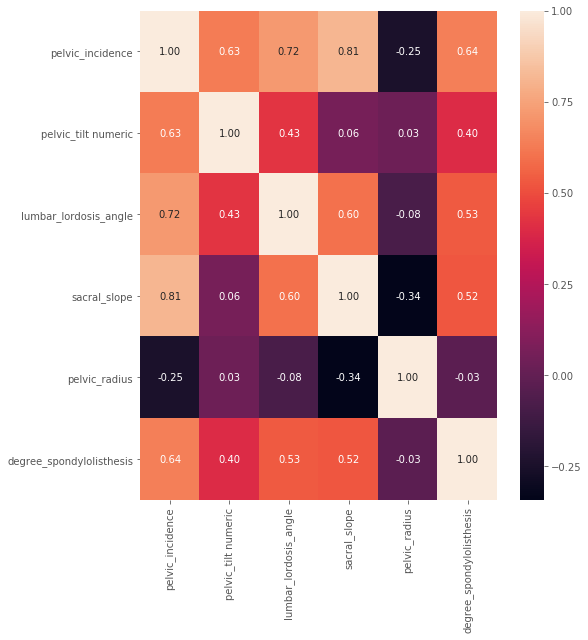

In [201]:
d=data.corr()
plt.figure(figsize=(8,9))
sns.heatmap(data=d,xticklabels=d.columns,yticklabels=d.columns,fmt="0.2f",annot=True)

Abnormal    210
Normal      100
Name: class, dtype: int64

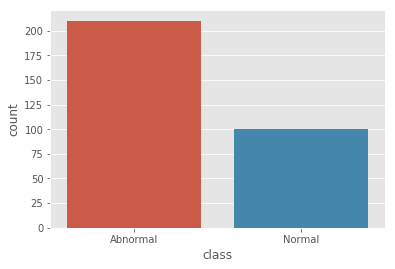

In [202]:
sns.countplot(x="class", data=data)
data['class'].value_counts()

<a id="4"></a> <br>
###  K-NEAREST NEIGHBORS (KNN)
* KNN: Look at the K closest labeled data points
* Classification method.
* First we need to train our data. Train = fit
* fit(): fits the data, train the data.
* predict(): predicts the data
<br> If you do not understand what is KNN, look at youtube there are videos like 4-5 minutes. You can understand better with it.
<br> Lets learn how to implement it with sklearn
* x: features
* y: target variables(normal, abnormal)
* n_neighbors: K. In this example it is 3. it means that Look at the 3 closest labeled data points


In [234]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Ab

* Well, we fit the data and predict it with KNN. 
* So, do we predict correct or what is our accuracy or the accuracy is best metric to evaluate our result? Lets give answer of this questions
<br> Measuring model performance:
* Accuracy which is fraction of correct predictions is commonly used metric. We will use it know but there is another problem

<br>As you see I train data with x (features) and again predict the x(features). Yes you are reading right but yes you are right again it is absurd :)

<br>Therefore we need to split our data train and test sets.
* train: use train set by fitting
* test: make prediction on test set.
* With train and test sets, fitted data and tested data are completely different
* train_test_split(x,y,test_size = 0.3,random_state = 1)
    * x: features
    * y: target variables (normal,abnormal)
    * test_size: percentage of test size. Example test_size = 0.3, test size = 30% and train size = 70%
    * random_state: sets a seed. If this seed is same number, train_test_split() produce exact same split at each time
* fit(x_train,y_train): fit on train sets
* score(x_test,y_test)): predict and give accuracy on test sets

In [205]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 54)
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
#print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.8709677419354839


Accuracy is 87% so is it good ? I do not know actually, we will see at the end of tutorial.
<br> Now the question is why we choose K = 3 or what value we need to choose K. The answer is in model complexity

<br> Model complexity:
* K has general name. It is called a hyperparameter. For now just know K is hyperparameter and we need to choose it that gives best performace. 
* Literature says if k is small, model is complex model can lead to overfit. It means that model memorizes the train sets and cannot predict test set with good accuracy.
* If k is big, model that is less complex model can lead to underfit. 
* At below, I range K value from 1 to 25(exclude) and find accuracy for each K value. As you can see in plot, when K is 1 it memozize train sets and cannot give good accuracy on test set (overfit). Also if K is 18, model is lead to underfit. Again accuracy is not enough. However look at when K is 6(best performance), accuracy has highest value almost 88%. 



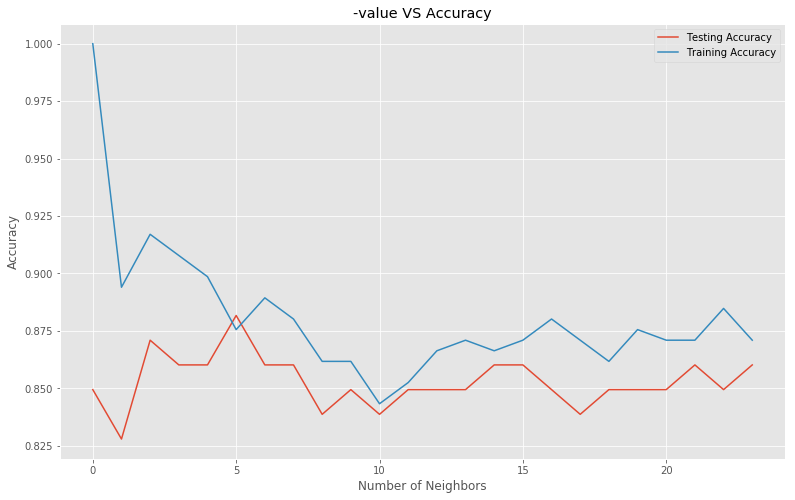

Best accuracy is 0.8817204301075269 with K = 6


In [206]:
# Model complexity

train_accuracy = []
test_accuracy = []
# Loop over different values of k
for k in range (1,25):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(test_accuracy, label = 'Testing Accuracy')
plt.plot(train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [231]:
# RF
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 93)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 4)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
rf.fit(x_train,y_train)
prediction = rf.predict(x_test)
print('With RF (max_depth=3) accuracy is: ',rf.score(x_test,y_test)) # accuracy

With RF (max_depth=3) accuracy is:  0.8709677419354839


In [236]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
prediction = logreg.predict(x_test)
print('With LogisticRegressionaccuracy is: ',logreg.score(x_test,y_test)) # accuracy

With LogisticRegressionaccuracy is:  0.8387096774193549


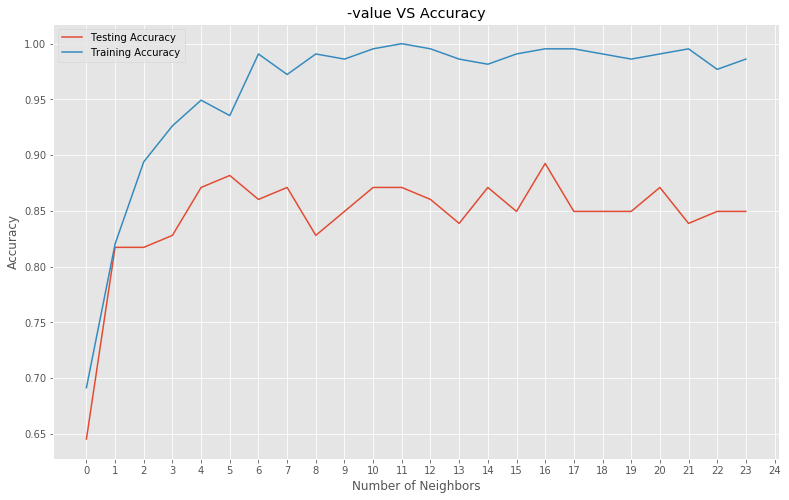

Best accuracy is 0.8924731182795699 with max_depth = 17


In [237]:
# Model complexity

train_accuracy = []
test_accuracy = []
# Loop over different values of k
for d in range (1,25):
    # d from 1 to 25(exclude)
    rf = RandomForestClassifier(max_depth=d)
    # Fit with rf
    rf.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(rf.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(rf.score(x_test, y_test))
    

# Plot
plt.figure(figsize=[13,8])
plt.plot(test_accuracy, label = 'Testing Accuracy')
plt.plot(train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xticks(np.arange(0,25))
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with max_depth = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

### Up to this point what you learn:
* Supervised learning
* Exploratory data analysis
* KNN and RF
    * How to split data
    * How to fit, predict data
    * How to measure medel performance (accuracy)
    * How to choose hyperparameter (K)


<a id="5"></a> <br>
### REGRESSION
* Supervised learning
* We will learn linear and logistic regressions
* This orthopedic patients data is not proper for regression so I only use two features that are *sacral_slope* and *pelvic_incidence* of abnormal 
    * I  consider feature is pelvic_incidence and target is sacral_slope 
    * Lets look at scatter plot so as to understand it better

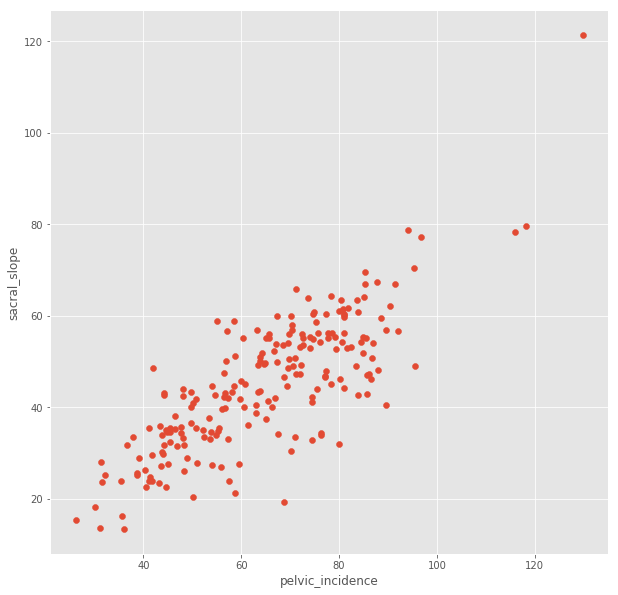

In [238]:
# create data1 that includes pelvic_incidence that is feature and sacral_slope that is target variable
data1 = data[data['class'] =='Abnormal']

x = data1["pelvic_incidence"]
y = data1["sacral_slope"]
x=x.values.reshape(-1,1)
y=y.values.reshape(-1,1)
# Scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

Now we have our data to make regression. In regression problems target value is continuously varying variable such as price of house or sacral_slope. Lets fit line into this points.

<br> Linear regression
* y = ax + b       where  y = target, x = feature and a = parameter of model
* We choose parameter of model(a) according to minimum error function that is lost function
* In linear regression we use Ordinary Least Square (OLS) as lost function.
* OLS: sum all residuals but some positive and negative residuals can cancel each other so we sum of square of residuals. It is called OLS
* Score: Score uses R^2 method that is ((y_pred - y_mean)^2 )/(y_actual - y_mean)^2

R^2 score:  0.6458410481075871


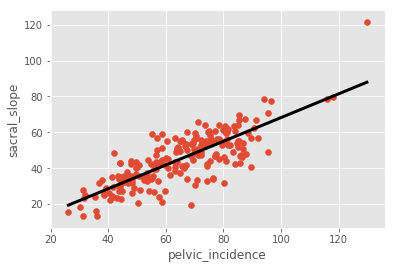

In [239]:
# LinearRegression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# Predict space
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)
# Fit
reg.fit(x,y)
# Predict
predicted = reg.predict(predict_space)
# R^2 
print('R^2 score: ',reg.score(x, y))

# Plot regression line and scatter
plt.plot (predict_space,predicted, color='black', linewidth=3)
plt.scatter(x,y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

<a id="6"></a> <br>
### CROSS VALIDATION
As you know in KNN method we use train test split with random_state that split exactly same at each time. However, if we do not use random_state, data is split differently at each time and according to split accuracy will be different. Therefore, we can conclude that model performance is dependent on train_test_split. For example you split, fit and predict data 5 times and accuracies are 0.89, 0.9, 0.91, 0.92 and 0.93, respectively. Which accuracy do you use? Do you know what accuracy will be at 6th times split, train and predict. The answer is I do not know but if I use cross validation I can find acceptable accuracy.
<br> Cross Validation (CV)
* K folds = K fold CV.
* Look at this image it defines better than me :)
* When K is increase, computationally cost is increase
* cross_val_score(reg,x,y,cv=5): use reg(linear regression) with x and y that we define at above and K is 5. It means 5 times(split, train,predict)


In [240]:
# CV
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 6
cv_result = cross_val_score(reg,x,y,cv=k) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.43000935 0.59581689 0.5819292  0.47603177 0.20981054 0.23291668]
CV scores average:  0.4210857377256712


### Regularized Regression
As we learn linear regression choose parameters (coefficients) while minimizing lost function. If linear regression thinks that one of the feature is important, it gives high coefficient to this feature. However, this can cause overfitting that is like memorizing in KNN. In order to avoid overfitting, we use regularization that penalize large coefficients.

* Ridge regression: First regularization technique. Also it is called L2 regularization. 
    * Ridge regression lost fuction = OLS + alpha * sum(parameter^2)
    * alpha is parameter we need to choose to fit and predict. Picking alpha is similar to picking K in KNN. As you understand alpha is hyperparameter that we need to choose for best accuracy and model complexity. This process is called hyperparameter tuning.
    * What if alpha is zero? lost function = OLS so that is linear rigression :)
    * If alpha is small that can cause overfitting
    * If alpha is big that can cause underfitting. But do not ask what is small and big. These can be change from problem to problem.
* Lasso regression: Second regularization technique. Also it is called L1 regularization. 
    * Lasso regression lost fuction = OLS + alpha * sum(absolute_value(parameter))
    * It can be used to select important features od the data. Because features whose values are not shrinked to zero, is chosen by lasso regression
    * In order to choose feature, I add new features in our regression data
    
<br> Linear vs Ridge vs Lasso
First impression: Linear
Feature Selection: 1.Lasso 2.Ridge
Regression model: 1.Ridge 2.Lasso 3.Linear 



In [241]:
# Ridge
from sklearn.linear_model import Ridge
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2, test_size = 0.3)
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
print('Ridge score: ',ridge.score(x_test,y_test))

Ridge score:  0.5608287918841997


In [242]:
# Lasso
from sklearn.linear_model import Lasso
x = np.array(data1.loc[:,['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','pelvic_radius']])
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 3, test_size = 0.3)
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train,y_train)
lasso_predict = lasso.predict(x_test)
print('Lasso score: ',lasso.score(x_test,y_test))
print('Lasso coefficients: ',lasso.coef_)

Lasso score:  0.9640334804327547
Lasso coefficients:  [ 0.82498243 -0.7209057   0.         -0.        ]


As you can see *pelvic_incidence* and *pelvic_tilt numeric* are important features but others are not important

<br> Now lets discuss accuracy. Is it enough for measurement of model selection. For example, there is a data that includes 95% normal and 5% abnormal samples and our model uses accuracy for measurement metric. Then our model predict 100% normal for all samples and accuracy is 95% but it classify all abnormal samples wrong. Therefore we need to use confusion matrix as a model measurement matris in imbalance data.
<br> While using confusion matrix lets use Random forest classifier to diversify classification methods.
* tp = true positive(20), fp = false positive(7), fn = false negative(8), tn = true negative(58) 
* tp = Prediction is positive(normal) and actual is positive(normal). 
* fp = Prediction is positive(normal) and actual is negative(abnormal).
* fn = Prediction is negative(abnormal) and actual is positive(normal).
* tn = Prediction is negative(abnormal) and actual is negative(abnormal)
* precision = tp / (tp+fp)
* recall = tp / (tp+fn)
* f1 = 2 * precision * recall / ( precision + recall)



In [227]:
# Confusion matrix with random forest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[66  0]
 [ 0 27]]
Classification report: 
              precision    recall  f1-score   support

   Abnormal       1.00      1.00      1.00        66
     Normal       1.00      1.00      1.00        27

avg / total       1.00      1.00      1.00        93



<a id="7"></a> <br>
### ROC Curve with Logistic Regression 
* logistic regression output is probabilities
* If probability is higher than 0.5 data is labeled 1(abnormal) else 0(normal)
* By default logistic regression threshold is 0.5
* ROC is receiver operationg characteristic. In this curve x axis is false positive rate and y axis is true positive rate
* If the curve in plot is closer to left-top corner, test is more accurate.
* Roc curve score is auc that is computation area under the curve from prediction scores
* We want auc to closer 1
* fpr = False Positive Rate
* tpr = True Positive Rate
* If you want, I made ROC, Random forest and K fold CV in this tutorial. https://www.kaggle.com/kanncaa1/roc-curve-with-k-fold-cv/

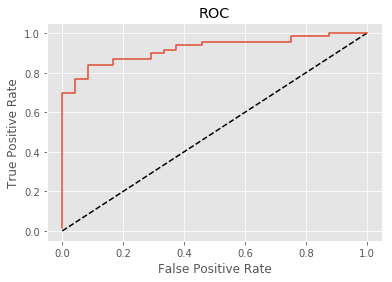

In [250]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
# abnormal = 1 and normal = 0
data['class_binary'] = [1 if i == 'Abnormal' else 0 for i in data.loc[:,'class']]
x,y = data.loc[:,(data.columns != 'class') & (data.columns != 'class_binary')], data.loc[:,'class_binary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()


<a id="8"></a> <br>
### HYPERPARAMETER TUNING
As I mention at KNN there are hyperparameters that are need to be tuned
* For example: 
    * k at KNN
    * alpha at Ridge and Lasso
    * Random forest parameters like max_depth
    * linear regression parameters(coefficients)
* Hyperparameter tuning: 
    * try all of combinations of different parameters
    * fit all of them
    * measure prediction performance
    * see how well each performs
    * finally choose best hyperparameters
* This process is most difficult part of this tutorial. Because we will write a lot of for loops to iterate all combinations. Just I am kidding sorry for this :) (We actually did it at KNN part)
* We only need is one line code that is GridSearchCV
    * grid: K is from 1 to 50(exclude)
    * GridSearchCV takes knn and grid and makes grid search. It means combination of all hyperparameters. Here it is k.


In [264]:
# grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=5) # GridSearchCV
knn_cv.fit(x,y)# Fit

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 7}
Best score: 0.8225806451612904


Other grid search example with 2 hyperparameter
* First hyperparameter is C:logistic regression regularization parameter
    * If C is high: overfit
    * If C is low: underfit
* Second hyperparameter is penalty(lost function): l1 (Lasso) or l2(Ridge) as we learnt at linear regression part.

In [265]:
# grid search cross validation with 2 hyperparameter
# 1. hyperparameter is C:logistic regression regularization parameter
# 2. penalty l1 or l2
# Hyperparameter grid
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 12)
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv=3)
logreg_cv.fit(x_train,y_train)

# Print the optimal parameters and best score
print("Tuned hyperparameters : {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))


Tuned hyperparameters : {'C': 100.0, 'penalty': 'l2'}
Best Accuracy: 0.8525345622119815


<a id="9"></a> <br>
### PRE-PROCESSING DATA
* In real life data can include objects or categorical data in order to use them in sklearn we need to encode them into numerical data
* In data, class is *abnormal* and *normal*. Lets convert them into numeric value (actually I did it in logistic regression part with different method)
* 2 different feature is created with the name *class_Abnormal* and *class_Normal*
* However we need to drop one of the column because they are duplicated

In [266]:
# Load data
data = pd.read_csv('/Users/garvitkhurana/Desktop/Projects/Data_Science/column_2C_weka.csv')
# get_dummies
df = pd.get_dummies(data)
df.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal,class_Normal
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1,0
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,1,0
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,1,0
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,1,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,1,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,1,0


In [267]:
# drop one of the feature
df.drop("class_Normal",axis = 1, inplace = True) 
df.head(10)
# instead of two steps we can make it with one step pd.get_dummies(data,drop_first = True)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,1
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,1
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,1
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,1
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,1


Other preprocessing step is centering, scaling or normalizing 
* If you listen my advice and watch KNN in youtube, you have noticed that KNN uses form of distance for classificaiton like some oher methods. Therefore, we need to scale data. For this reason, we use 
    * standardization: ( x - x.mean) / x.variance   or   x - x.min / x.range
* pipeline: The purpose of the pipeline is to assemble several steps like svm(classifier) and  standardization(pre-processing)
* How we create parameters name: for example SVM_ _C :  stepName__parameterName
* Then grid search to find best parameters

In [268]:
# SVM, pre-process and pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps = [('scalar', StandardScaler()),
         ('SVM', SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 1)
cv = GridSearchCV(pipeline,param_grid=parameters,cv=3)
cv.fit(x_train,y_train)

y_pred = cv.predict(x_test)

print("Accuracy: {}".format(cv.score(x_test, y_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))


Accuracy: 0.8548387096774194
Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}


<a id="10"></a> <br>
## UNSUPERVISED LEARNING
* Unsupervised learning: It uses data that has unlabeled and uncover hidden patterns from unlabeled data. Example, there are orthopedic patients data that do not have labels. You do not know which orthopedic patient is normal or abnormal.
* As you know orthopedic patients data is labeled (supervised) data. It has target variables. In order to work on unsupervised learning, lets drop target variables and to visualize just consider *pelvic_radius* and *degree_spondylolisthesis*


<a id="11"></a> <br>
### KMEANS
* Lets try our first unsupervised method that is KMeans Cluster
* KMeans Cluster: The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity
* KMeans(n_clusters = 2): n_clusters = 2 means that create 2 cluster

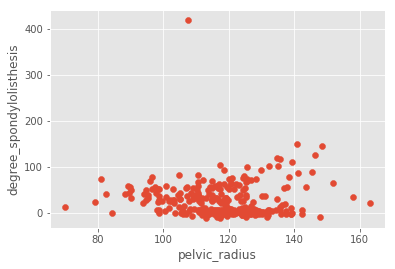

In [272]:
# As you can see there is no labels in data
data = pd.read_csv('/Users/garvitkhurana/Desktop/Projects/Data_Science/column_2C_weka.csv')
plt.scatter(data['pelvic_radius'],data['degree_spondylolisthesis'])
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()

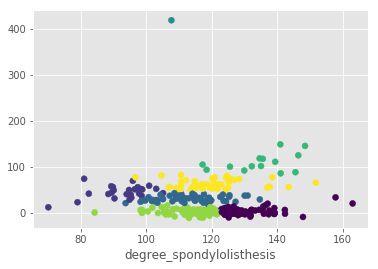

In [282]:
# KMeans Clustering
data2 = data.loc[:,['degree_spondylolisthesis','pelvic_radius']]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 7)
kmeans.fit(data2)
labels = kmeans.predict(data2)
plt.scatter(data['pelvic_radius'],data['degree_spondylolisthesis'],c = labels)
plt.xlabel('pelvic_radius')
plt.xlabel('degree_spondylolisthesis')
plt.show()

<a id="12"></a> <br>
### EVALUATING OF CLUSTERING
We cluster data in two groups. Okey well is that correct clustering? In order to evaluate clustering we will use cross tabulation table.
* There are 7 clusters that are *0*, *1* , . . . *6*
* First class *0* includes 138 abnormal and 100 normal patients
* Second class *1* includes 72 abnormal and 0 normal patiens
*The majority of two clusters are abnormal patients.

In [283]:
# cross tabulation table
df = pd.DataFrame({'labels':labels,"class":data['class']})
ct = pd.crosstab(df['labels'],df['class'])
print(ct)

class   Abnormal  Normal
labels                  
0             19      54
1             25       0
2             59       2
3              1       0
4             14       0
5             48      44
6             44       0


The new question is that we know how many class data includes, but what if number of class is unknow in data. This is kind of like hyperparameter in KNN or regressions. 
* inertia: how spread out the clusters are distance from each sample
* lower inertia means more clusters
* What is the best number of clusters ?
    *There are low inertia and not too many cluster trade off so we can choose elbow

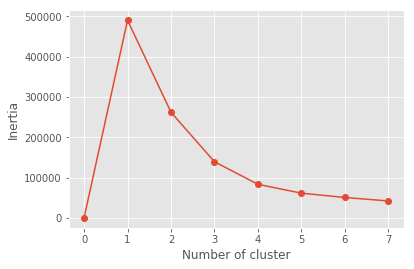

In [293]:
# inertia
inertia_list = np.empty(8)
for i in range(1,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data2)
    inertia_list[i] = kmeans.inertia_
plt.plot(range(0,8),inertia_list,"-o")
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

<a id="13"></a> <br>
### STANDARDIZATION
* Standardizaton is important for both supervised and unsupervised learning
* Do not forget standardization as pre-processing
* As we already have visualized data so you got the idea. Now we can use all features for clustering.
* We can use pipeline like supervised learning.

In [295]:
data = pd.read_csv('/Users/garvitkhurana/Desktop/Projects/Data_Science/column_2C_weka.csv')
data3 = data.drop('class',axis = 1)

In [302]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scalar = StandardScaler()
kmeans = KMeans(n_clusters = 2)

pipe = make_pipeline(scalar,kmeans)
pipe.fit(data3)
labels = pipe.predict(data3)
df = pd.DataFrame({'labels':labels,"class":data['class']})
ct = pd.crosstab(df['labels'],df['class'])
print(ct)

class   Abnormal  Normal
labels                  
0             97      90
1            113      10


<a id="15"></a> <br>
### T - Distributed Stochastic Neighbor Embedding (T - SNE)
 * learning rate: 50-200 in normal
 * fit_transform: it is both fit and transform. t-sne has only have fit_transform
 * Varieties have same position relative to one another

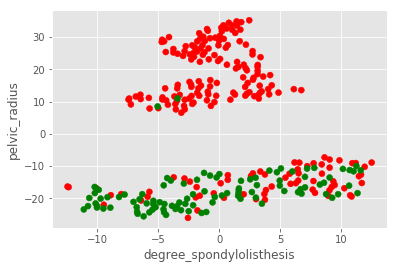

In [316]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)
transformed = model.fit_transform(data2)
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x,y,c = color_list )
plt.ylabel('pelvic_radius')
plt.xlabel('degree_spondylolisthesis')
plt.show()

<a id="16"></a> <br>
### PRINCIPLE COMPONENT ANALYSIS (PCA)
* Fundemental dimension reduction technique
* first step is decorrelation:
    * rotates data samples to be aligned with axes
    * shifts data samples so they have mean zero
    * no information lost
    * fit() : learn how to shift samples
    * transform(): apply the learned transformation. It can also be applies test data
* Resulting PCA features are not linearly correlated
* Principle components: directions of variance

In [317]:
# PCA
from sklearn.decomposition import PCA
model = PCA()
model.fit(data3)
transformed = model.transform(data3)
print('Principle components: ',model.components_)

Principle components:  [[ 3.23645647e-01  1.13192291e-01  3.03674740e-01  2.10453357e-01
  -2.99598300e-02  8.63153779e-01]
 [-4.76634849e-01 -9.85632787e-02 -5.32783979e-01 -3.78071570e-01
   3.21809199e-01  4.82438036e-01]
 [-1.54481282e-03 -2.64657410e-01 -4.96541893e-01  2.63112598e-01
  -7.74612852e-01  1.18940778e-01]
 [ 3.73677251e-01  7.54113757e-01 -3.39411757e-01 -3.80436506e-01
  -1.75106042e-01 -3.29143086e-02]
 [-4.41703869e-01  7.35414748e-02  5.12024113e-01 -5.15245344e-01
  -5.14639730e-01  8.35992525e-02]
 [ 5.77350269e-01 -5.77350269e-01 -1.08930766e-11 -5.77350269e-01
  -3.59066811e-12  3.06727015e-12]]


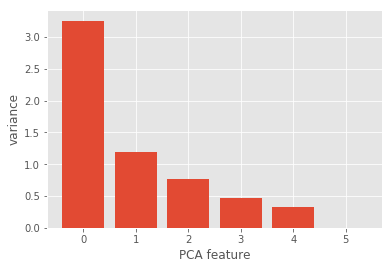

In [318]:
# PCA variance
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler,pca)
pipeline.fit(data3)

plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()


* Second step: intrinsic dimension: number of feature needed to approximate the data essential idea behind dimension reduction
* PCA identifies intrinsic dimension when samples have any number of features
* intrinsic dimension = number of PCA feature with significant variance
* In order to choose intrinsic dimension try all of them and find best accuracy

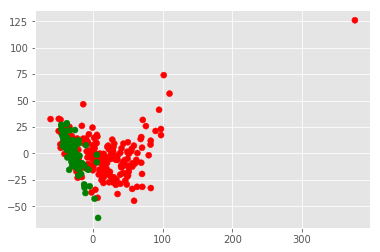

In [319]:
# apply PCA
pca = PCA(n_components = 2)
pca.fit(data3)
transformed = pca.transform(data3)
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x,y,c = color_list)
plt.show()